# Using BLE RSSI Values to Classify Proximity with Deep Neural Networks

In [1]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import visualkeras
import matplotlib.pyplot as plt

In [2]:
model_name = '1denselayers_hiddenlayersize128'
hidden_layer_size = 128

In [3]:
df = pd.read_csv("rssi_dataset_3.csv")

In [4]:
df

,Unnamed: 0,rssi,target
0,0,-98,0
1,1,-99,0
2,2,-100,0
3,3,-99,0
4,4,-88,0
...,...,...,...
13881,13881,-98,0
13882,13882,-69,1
13883,13883,-96,0
13884,13884,-66,1


In [5]:
train_labels = df['target']
train_samples = df['rssi']

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [7]:
scaled_train_samples = train_samples.reshape(-1,1)

In [8]:
print(scaled_train_samples)

[[ -98]
 [ -99]
 [-100]
 ...
 [ -96]
 [ -66]
 [ -67]]


In [9]:
print(train_labels)

[0 0 0 ... 0 1 1]


## Simple tf.keras Sequential Model

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, DenseFeatures
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow import lite
from keras.utils import plot_model

In [11]:
physial_devices = tf.config.experimental.list_physical_devices('GPU')
print("Available: ", len(physial_devices))

Available:  0


In [12]:
model = Sequential([
    Dense(units=hidden_layer_size, input_shape=(1,), activation='relu'),
    Dropout(rate = 0.1),
    Dense(units=2, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 514
Trainable params: 514
Non-trainable params: 0
_________________________________________________________________


In [14]:
visualkeras.layered_view(model, to_file= 'visualkeras/' + model_name + '.png')

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.2, batch_size=10, epochs=75, shuffle=True, verbose=2)

Epoch 1/75
1111/1111 - 1s - loss: 2.0431 - accuracy: 0.6391 - val_loss: 0.9974 - val_accuracy: 0.7196
Epoch 2/75
1111/1111 - 1s - loss: 1.3817 - accuracy: 0.6335 - val_loss: 0.7581 - val_accuracy: 0.7196
Epoch 3/75
1111/1111 - 1s - loss: 1.1401 - accuracy: 0.6454 - val_loss: 0.6032 - val_accuracy: 0.7196
Epoch 4/75
1111/1111 - 1s - loss: 0.9740 - accuracy: 0.6494 - val_loss: 0.6097 - val_accuracy: 0.7196
Epoch 5/75
1111/1111 - 1s - loss: 0.8282 - accuracy: 0.6606 - val_loss: 0.5328 - val_accuracy: 0.7196
Epoch 6/75
1111/1111 - 1s - loss: 0.6935 - accuracy: 0.6782 - val_loss: 0.4590 - val_accuracy: 0.7196
Epoch 7/75
1111/1111 - 1s - loss: 0.6121 - accuracy: 0.6969 - val_loss: 0.4815 - val_accuracy: 0.7196
Epoch 8/75
1111/1111 - 1s - loss: 0.5421 - accuracy: 0.7197 - val_loss: 0.4405 - val_accuracy: 0.7196
Epoch 9/75
1111/1111 - 1s - loss: 0.4966 - accuracy: 0.7324 - val_loss: 0.4289 - val_accuracy: 0.7196
Epoch 10/75
1111/1111 - 1s - loss: 0.4635 - accuracy: 0.7454 - val_loss: 0.4245 - 

In [17]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


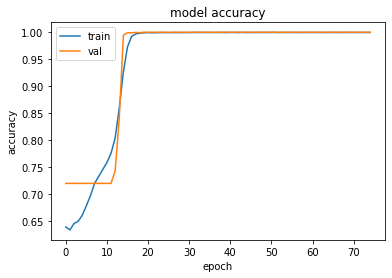

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('plots/accuracy_' + model_name + '.png')
plt.show()

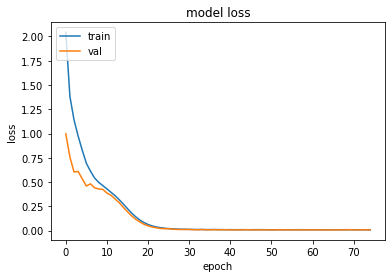

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.ylim(.55 , .65)
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('plots/loss_' + model_name + '.png')
plt.show()

## Predict

## Export Model

In [20]:
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open("model_1_128.tflite", "wb").write(tfmodel)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\KAVINDA\AppData\Local\Temp\tmp_v2qfen9\assets


3368